<a href="https://colab.research.google.com/github/Prostotarakan/Lab_NNMO/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Simple CNN model for CIFAR-10
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import backend as K

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


from google.colab import files

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Небольшая модель

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 32, 32,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


callback = EarlyStopping(monitor='val_accuracy', patience=3)

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, callbacks=[callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
1563/1563 [==============================] - 16s 6ms/step - loss: 1.8905 - accuracy: 0.3112 - val_loss: 1.4013 - val_accuracy: 0.4996
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4022 - accuracy: 0.4956 - val_loss: 1.2914 - val_accuracy: 0.5442
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2765 - accuracy: 0.5434 - val_loss: 1.1942 - val_accuracy: 0.5754
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2050 - accuracy: 0.5750 - val_loss: 1.1651 - val_accuracy: 0.5892
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1507 - accuracy: 0.5872 - val_loss: 1.1277 - val_accuracy: 0.6020
Accuracy: 60.20%


Изменение параметров нейронки, часть первая.
Меняются: число слоев, размер блоков, число ядер, скорость обучения.

Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 34.20%
Accuracy: 37.83%
Accuracy: 10.00%
Accuracy: 36.31%
Accuracy: 39.38%
Accuracy: 38.66%
Accuracy: 38.92%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 37.89%
Accuracy: 57.35%
Accuracy: 57.41%
Accuracy: 55.53%
Accuracy: 53.88%
Accuracy: 55.95%
Accuracy: 43.75%
Accuracy: 47.96%
Accuracy: 37.60%
Accuracy: 45.05%
Accuracy: 10.00%
Accuracy: 60.35%
Accuracy: 59.41%
Accuracy: 54.08%
Accuracy: 59.56%
Accuracy: 60.04%
Accuracy: 45.86%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 45.52%
Accuracy: 53.76%
Accuracy: 62.47%
Accuracy: 60.46%
Accuracy: 60.69%
Accuracy: 61.42%
Accuracy: 61.34%


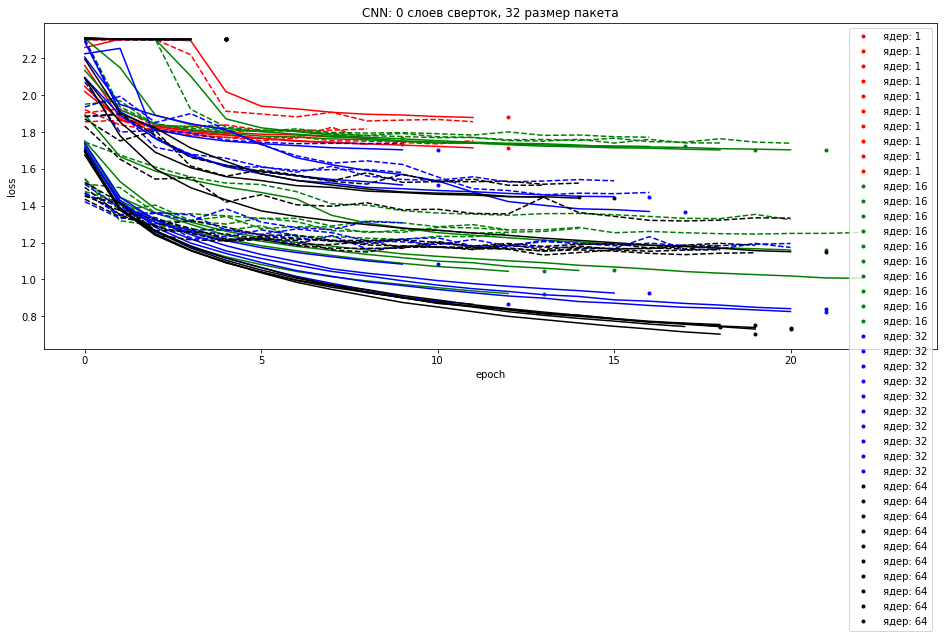

Accuracy: 38.04%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.03%
Accuracy: 38.23%
Accuracy: 36.35%
Accuracy: 37.86%
Accuracy: 44.03%
Accuracy: 34.98%
Accuracy: 9.99%
Accuracy: 36.93%
Accuracy: 37.27%
Accuracy: 57.45%
Accuracy: 59.18%
Accuracy: 56.78%
Accuracy: 57.29%
Accuracy: 58.43%
Accuracy: 42.50%
Accuracy: 53.97%
Accuracy: 53.52%
Accuracy: 35.39%
Accuracy: 44.05%
Accuracy: 60.53%
Accuracy: 61.12%
Accuracy: 60.96%
Accuracy: 61.23%
Accuracy: 62.36%
Accuracy: 53.38%
Accuracy: 51.84%
Accuracy: 51.78%
Accuracy: 43.75%
Accuracy: 47.06%
Accuracy: 61.27%
Accuracy: 62.98%
Accuracy: 60.94%
Accuracy: 62.87%
Accuracy: 61.13%


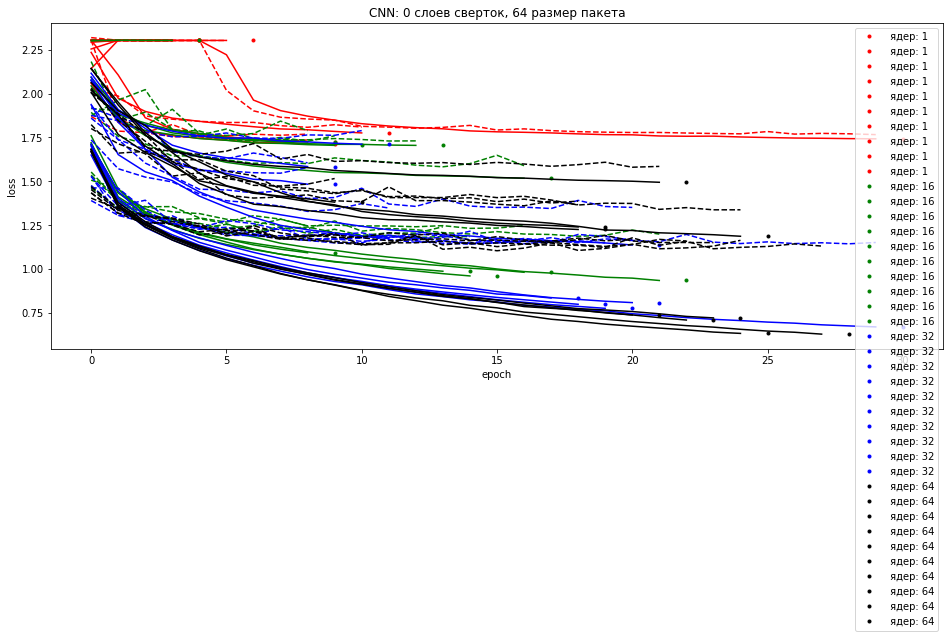

Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 37.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 9.99%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 60.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 63.84%
Accuracy: 64.81%
Accuracy: 62.97%
Accuracy: 63.66%
Accuracy: 64.33%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 66.01%
Accuracy: 67.71%
Accuracy: 67.12%
Accuracy: 66.49%
Accuracy: 66.71%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 67.84%
Accuracy: 68.81%
Accuracy: 68.48%
Accuracy: 67.47%
Accuracy: 68.30%


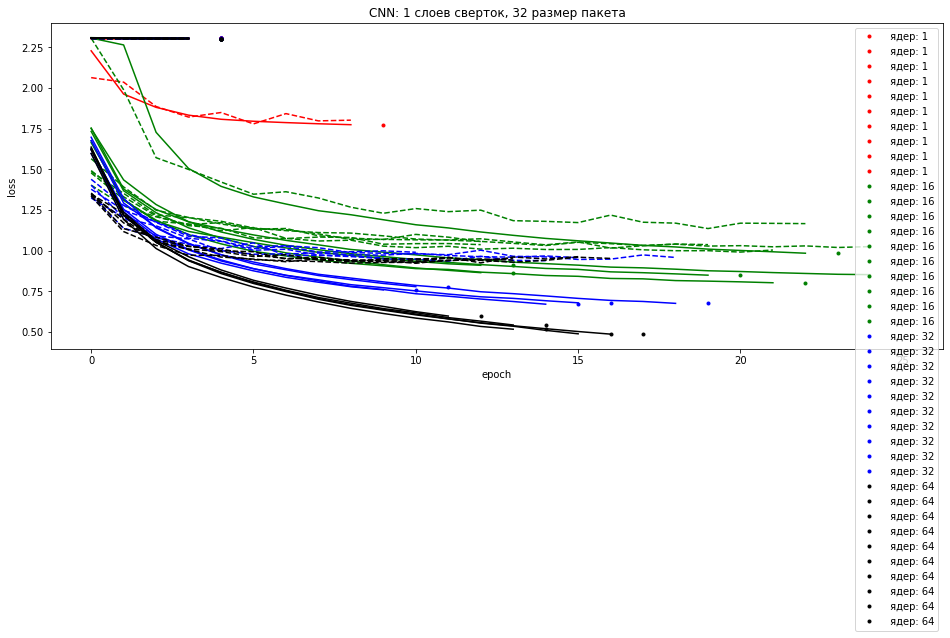

Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 33.33%
Accuracy: 33.65%
Accuracy: 32.76%
Accuracy: 42.03%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 59.63%
Accuracy: 65.67%
Accuracy: 64.89%
Accuracy: 64.08%
Accuracy: 64.62%
Accuracy: 65.55%
Accuracy: 62.84%
Accuracy: 37.05%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 60.83%
Accuracy: 67.24%
Accuracy: 67.39%
Accuracy: 67.99%
Accuracy: 67.68%
Accuracy: 66.87%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 67.93%
Accuracy: 68.93%
Accuracy: 68.18%
Accuracy: 68.03%
Accuracy: 68.40%


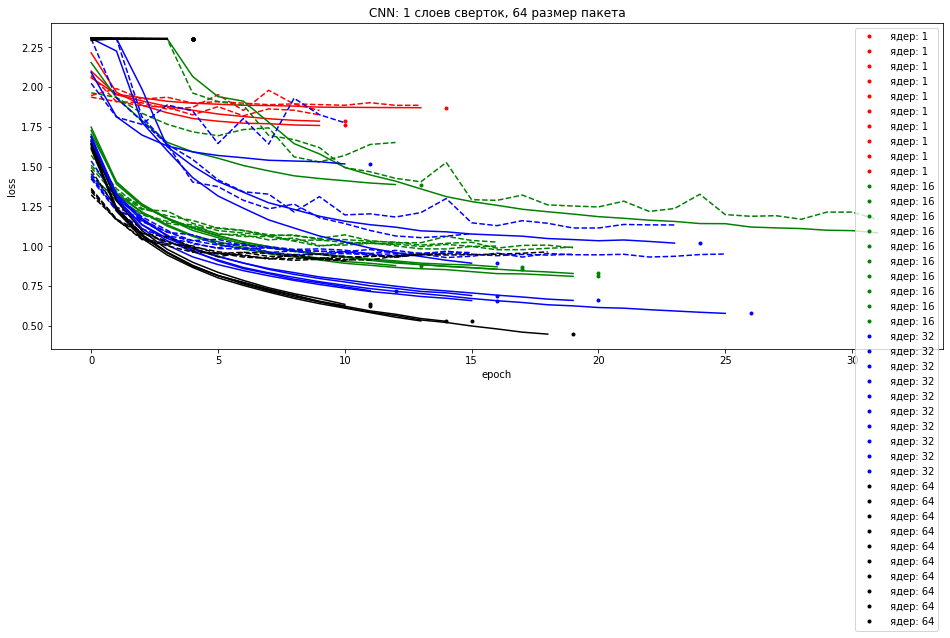

Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 19.17%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 19.20%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 66.62%
Accuracy: 66.10%
Accuracy: 65.44%
Accuracy: 65.75%
Accuracy: 58.67%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 71.35%
Accuracy: 69.20%
Accuracy: 73.66%
Accuracy: 71.68%
Accuracy: 71.29%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 74.11%
Accuracy: 74.61%
Accuracy: 73.72%
Accuracy: 74.63%
Accuracy: 75.92%


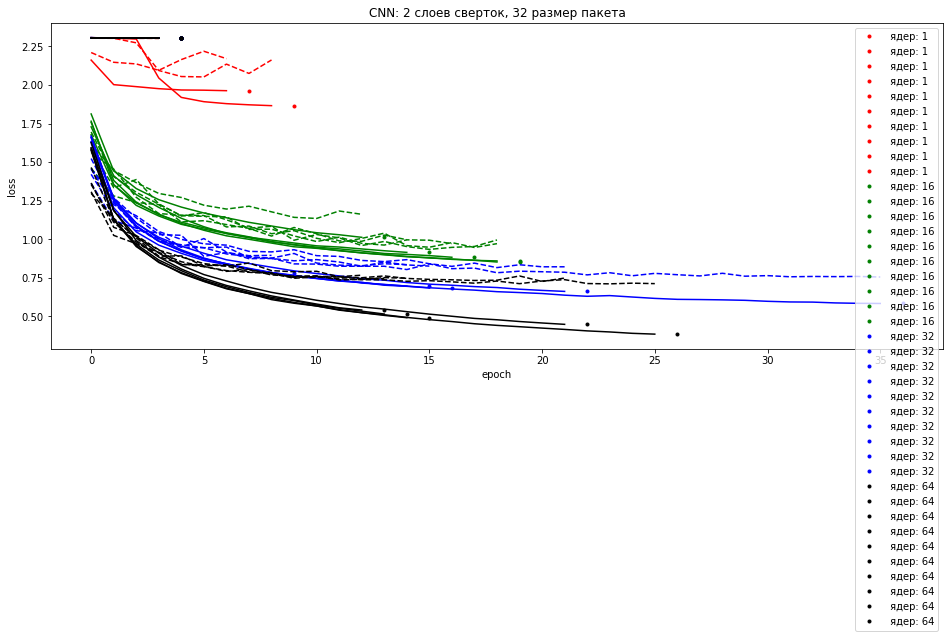

Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 29.24%
Accuracy: 10.00%
Accuracy: 26.10%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 66.10%
Accuracy: 66.08%
Accuracy: 64.46%
Accuracy: 64.14%
Accuracy: 68.32%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 72.99%
Accuracy: 72.98%
Accuracy: 71.73%
Accuracy: 72.73%
Accuracy: 70.09%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 10.00%
Accuracy: 73.20%
Accuracy: 74.91%
Accuracy: 74.11%
Accuracy: 74.93%
Accuracy: 71.86%


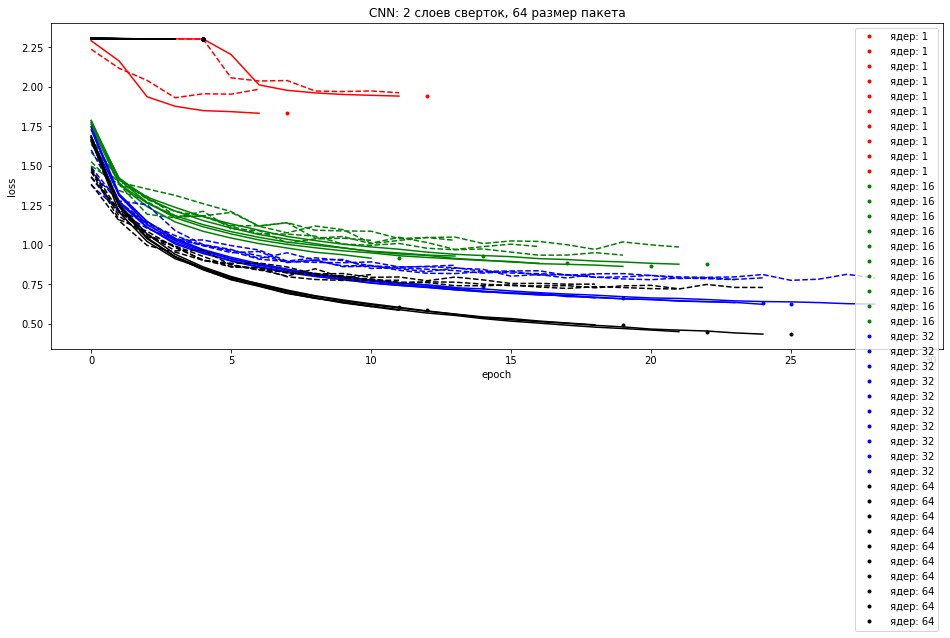

'\n            files.download("output.txt")\n            rez1 = np.array(rez)\n            df_rez = pd.DataFrame(data = rez1)\n            df_rez.to_csv(\'rez.csv\')\n            files.download(\'rez.csv\')\n'

In [30]:
# Create the model




callback = EarlyStopping(monitor='val_accuracy', patience=3)

rez=[]
Ep=[]
B=[]
LR=[]
Accur=[]
Lev=[]
Kern=[]
J=0
count=0
epochs=50
#for epochs in [1,2,3,4,5,10,15,20,25,30,40,50]:
for level in [0,1,2]:
  for b_size in [32, 64]:
    plt.figure(figsize=(16,6))
    cc = ['r','g','b','k']
    ic = 0
    for Ker in [1,16,32,64]:
      c = cc[ic]
      ic += 1
      for lrate in [0.1, 0.01]:

      
        for i in range(5):

          count+=1

        

          model = Sequential()

          model.add(Conv2D(Ker, (3, 3), input_shape=( 32, 32,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
          model.add(Dropout(0.2))
          for L in range(level):
            model.add(Conv2D(Ker, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
            model.add(Dropout(0.2))
            model.add(MaxPooling2D(pool_size=(2, 2)))
          
          model.add(Flatten())
          
          model.add(Dense(num_classes, activation='softmax', ))


          decay=lrate/epochs
          sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
          model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
          # Fit the model
          
          His = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=b_size, callbacks=[callback], verbose=0)
          # Final evaluation of the model
          
          Lo=His.history['val_loss']
          Acc=His.history['val_accuracy']
          Lot=His.history['loss']
          Acct=His.history['accuracy']
          plt.plot(Lo,'--'+c)
          plt.plot(Lot,'-'+c)
          plt.plot(len(Lot),Lot[-1],'.'+c,label=' ядер: '+str(Ker))

          scores = model.evaluate(X_test, y_test, verbose=0)
          print("Accuracy: %.2f%%" % (scores[1]*100))
          
          
          del model
          if (np.remainder(count,100)) == 0:
            with open("output.txt", "a") as file:
              file.write("\n")
              file.write(str(level))
              file.write("\n")
              file.write(str(Ker))
              file.write("\n")
              file.write(str(b_size))
              file.write("\n")
              file.write(str(lrate))
              file.write("\n")
              file.write(str(Acc))
              file.write("\n")
              file.write(str(Lo))
              file.write("\n")
              file.write(str(Acct))
              file.write("\n")
              file.write(str(Lot))
              file.write("\n")

              file.close()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('CNN: '+str(level)+' слоев сверток, '+ str(b_size)+' размер пакета')
    plt.show()              
'''
            files.download("output.txt")
            rez1 = np.array(rez)
            df_rez = pd.DataFrame(data = rez1)
            df_rez.to_csv('rez.csv')
            files.download('rez.csv')
'''





Изменение параметров нейронки: 
Для 32 ядер, 0.01 скорости обучения, 32 размера блоков оценить улучшение при изменении числа слоев

1 Accuracy: 56.59%
2 Accuracy: 58.23%
3 Accuracy: 61.51%
4 Accuracy: 58.70%
5 Accuracy: 58.81%
6 Accuracy: 67.56%
7 Accuracy: 67.12%
8 Accuracy: 66.27%
9 Accuracy: 66.55%
10 Accuracy: 66.28%
11 Accuracy: 69.45%
12 Accuracy: 73.53%
13 Accuracy: 71.10%
14 Accuracy: 73.52%
15 Accuracy: 71.64%
16 Accuracy: 68.45%
17 Accuracy: 71.55%
18 Accuracy: 73.60%
19 Accuracy: 71.08%
20 Accuracy: 73.90%
21 Accuracy: 69.93%
22 Accuracy: 75.16%
23 Accuracy: 72.22%
24 Accuracy: 72.08%
25 Accuracy: 70.94%
26 Accuracy: 69.83%
27 Accuracy: 69.32%
28 Accuracy: 66.26%
29 Accuracy: 70.92%
30 Accuracy: 68.49%


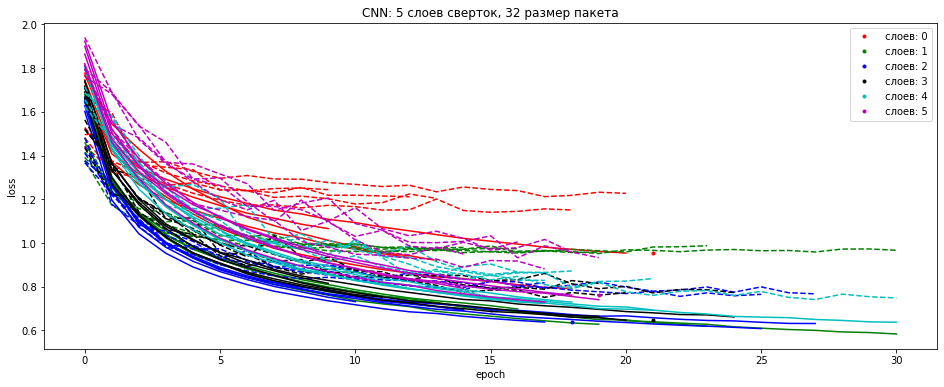

'\n            files.download("output.txt")\n            rez1 = np.array(rez)\n            df_rez = pd.DataFrame(data = rez1)\n            df_rez.to_csv(\'rez.csv\')\n            files.download(\'rez.csv\')\n'

In [10]:
callback = EarlyStopping(monitor='val_accuracy', patience=3)

rez=[]
Ep=[]
B=[]
LR=[]
Accur=[]
Lev=[]
Kern=[]
J=0
count=0
epochs=50
#for epochs in [1,2,3,4,5,10,15,20,25,30,40,50]:
for b_size in [32]:
  for Ker in [32]:
    plt.figure(figsize=(16,6))
    cc = ['r','g','b','k','c','m','y','pink','gold','lime','gray']

    ic = 0
    for level in [0,1,2,3,4,5]:  #,6,7,8,9,10]:
      c = cc[ic]
      ic += 1
      for lrate in [0.01]:

      
        for i in range(5):

          count+=1

          model = Sequential()

          model.add(Conv2D(Ker, (3, 3), input_shape=( 32, 32,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
          model.add(Dropout(0.2))
          for L in range(level):
            model.add(Conv2D(Ker, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
            model.add(Dropout(0.2))
            model.add(MaxPooling2D(pool_size=(2, 2)))
          
          model.add(Flatten())
          
          model.add(Dense(num_classes, activation='softmax'))


          decay=lrate/epochs
          sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
          model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
          # Fit the model
          
          His = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=b_size, callbacks=[callback], verbose=0)
          # Final evaluation of the model
          
          Lo=His.history['val_loss']
          Acc=His.history['val_accuracy']
          Lot=His.history['loss']
          Acct=His.history['accuracy']
          plt.plot(Lo,'--'+c)
          plt.plot(Lot,'-'+c)
          if i==4:
            plt.plot(len(Lot),Lot[-1],'.'+c,label=' слоев: '+str(level))

          scores = model.evaluate(X_test, y_test, verbose=0)
          print(str(count)+" Accuracy: %.2f%%" % (scores[1]*100))
          
          
          del model
          '''
          if (np.remainder(count,100)) == 0:
            with open("output.txt", "a") as file:
              file.write("\n")
              file.write(str(level))
              file.write("\n")
              file.write(str(Ker))
              file.write("\n")
              file.write(str(b_size))
              file.write("\n")
              file.write(str(lrate))
              file.write("\n")
              file.write(str(Acc))
              file.write("\n")
              file.write(str(Lo))
              file.write("\n")
              file.write(str(Acct))
              file.write("\n")
              file.write(str(Lot))
              file.write("\n")

              file.close()
              '''
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    
    plt.title('CNN: '+str(level)+' слоев сверток, '+ str(b_size)+' размер пакета')
    plt.show()              
'''
            files.download("output.txt")
            rez1 = np.array(rez)
            df_rez = pd.DataFrame(data = rez1)
            df_rez.to_csv('rez.csv')
            files.download('rez.csv')
'''

Количество ядер: Ker – 32

Число слоев: level – 3

Число эпох epochs – 50

Размер блоков: b_size – 32

Скорость обучения: lrate – 0.01


 Accuracy: 73.77%


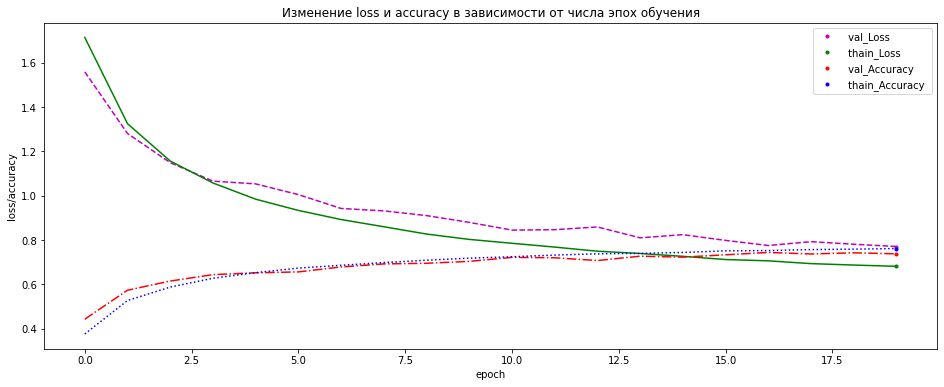

In [21]:
callback = EarlyStopping(monitor='val_accuracy', patience=3)


epochs= 50
b_size = 32
Ker = 32 
level = 3
lrate = 0.01



model = Sequential()

model.add(Conv2D(Ker, (3, 3), input_shape=( 32, 32,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
for L in range(level):
  model.add(Conv2D(Ker, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

decay=lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
          # Fit the model
          
His = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=b_size, callbacks=[callback], verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
print(" Accuracy: %.2f%%" % (scores[1]*100))

Lo=His.history['val_loss']
Acc=His.history['val_accuracy']
Lot=His.history['loss']
Acct=His.history['accuracy']

plt.figure(figsize=(16,6))

plt.plot(Lo,'--'+'m')
plt.plot(Lot,'-'+'g')

plt.plot(Acc,'-.'+'r')
plt.plot(Acct,':'+'b')
plt.plot(len(Lo)-1,Lo[-1],'.'+'m',label=' val_Loss ')
plt.plot(len(Lot)-1,Lot[-1],'.'+'g',label=' thain_Loss ')
plt.plot(len(Acc)-1,Acc[-1],'.'+'r',label=' val_Accuracy ')
plt.plot(len(Acct)-1,Acct[-1],'.'+'b',label=' thain_Accuracy ')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
    
plt.title('Изменение loss и accuracy в зависимости от числа эпох обучения')
plt.show() 

In [75]:
model.save_weights('Weig',save_format='h5')

Дообучение модели

In [65]:
del X_t
del Y_t

In [99]:
from tensorflow.keras.datasets import cifar100


# load data
(X_train100, y_train100), (X_test100, y_test100) = cifar100.load_data(label_mode='fine')

I=[4,30,72,55,95]




X_i=np.where(((y_test100)==I[0]) | ((y_test100)==I[1]) | ((y_test100)==I[2]) | ((y_test100)==I[3]) | ((y_test100)==I[4]) )[0]
X_t=X_test100[X_i,:,:,:]
Y_t=y_test100[X_i]

count=0
for i in I:
  X_i=np.where((Y_t)==i)
  Y_t[X_i]=count
  count+=1

X_i=np.where(((y_train100)==I[0]) | ((y_train100)==I[1]) | ((y_train100)==I[2]) | ((y_train100)==I[3]) | ((y_train100)==I[4]) )[0]
X_tr=X_train100[X_i,:,:,:]
Y_tr=y_train100[X_i]

count=0
for i in I:
  X_i=np.where((Y_tr)==i)
  Y_tr[X_i]=count
  count+=1

# normalize inputs from 0-255 to 0.0-1.0
X_tr = X_tr.astype('float32')
X_t = X_t.astype('float32')
X_tr = X_tr / 255.0
X_t = X_t / 255.0

# one hot encode outputs
Y_tr = utils.to_categorical(Y_tr)
Y_t = utils.to_categorical(Y_t)
num_classes = Y_t.shape[1]

In [100]:
Y_t[0:10]

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [104]:
model.trainable=False

X_in=model.layers[0].input
X_out=model.layers[-5].output

X_out=Flatten()(X_out)
Y_d=Dense(5,activation='softmax')(X_out)
model2 = Model(inputs=X_in, outputs=Y_d)
model3 = Model(inputs=X_in, outputs=[Y_d,model.layers[-1].output])
model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_264_input (InputLayer [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_264 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_265 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_180 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_266 (Conv2D)          (None, 16, 16, 32)        9248

In [105]:
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

His = model2.fit(X_tr, Y_tr, validation_data=(X_t, Y_t), epochs=epochs, batch_size=b_size, callbacks=[callback])
scores = model2.evaluate(X_t, Y_t, verbose=0)
print(" Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
79/79 [==============================] - 1s 7ms/step - loss: 1.4808 - accuracy: 0.3384 - val_loss: 1.2434 - val_accuracy: 0.4300
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 1.1810 - accuracy: 0.4903 - val_loss: 1.1710 - val_accuracy: 0.4800
Epoch 3/50
79/79 [==============================] - 0s 5ms/step - loss: 1.0772 - accuracy: 0.5405 - val_loss: 1.1362 - val_accuracy: 0.5180
Epoch 4/50
79/79 [==============================] - 0s 5ms/step - loss: 1.0285 - accuracy: 0.5923 - val_loss: 1.1117 - val_accuracy: 0.5200
Epoch 5/50
79/79 [==============================] - 0s 5ms/step - loss: 0.9815 - accuracy: 0.6067 - val_loss: 1.0968 - val_accuracy: 0.5300
Epoch 6/50
79/79 [==============================] - 0s 4ms/step - loss: 0.9601 - accuracy: 0.6169 - val_loss: 1.0888 - val_accuracy: 0.5380
Epoch 7/50
79/79 [==============================] - 0s 4ms/step - loss: 0.9230 - accuracy: 0.6423 - val_loss: 1.0709 - val_accuracy: 0.5660
Epoch 8/50
79/79 [==

In [106]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

His = model2.fit(X_tr, Y_tr, validation_data=(X_t, Y_t), epochs=100, batch_size=b_size, callbacks=[callback])
scores = model2.evaluate(X_t, Y_t, verbose=0)
print(" Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.8462 - accuracy: 0.6665 - val_loss: 1.0373 - val_accuracy: 0.5660
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7696 - accuracy: 0.7111 - val_loss: 1.0484 - val_accuracy: 0.5540
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7355 - accuracy: 0.7220 - val_loss: 1.0306 - val_accuracy: 0.5780
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.7496 - val_loss: 1.0426 - val_accuracy: 0.5640
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.7462 - val_loss: 1.0362 - val_accuracy: 0.5700
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.7715 - val_loss: 1.0398 - val_accuracy: 0.5840
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.7864 - val_loss: 1.0425 - val_accuracy: 0.5640
Epoch 8/100
7

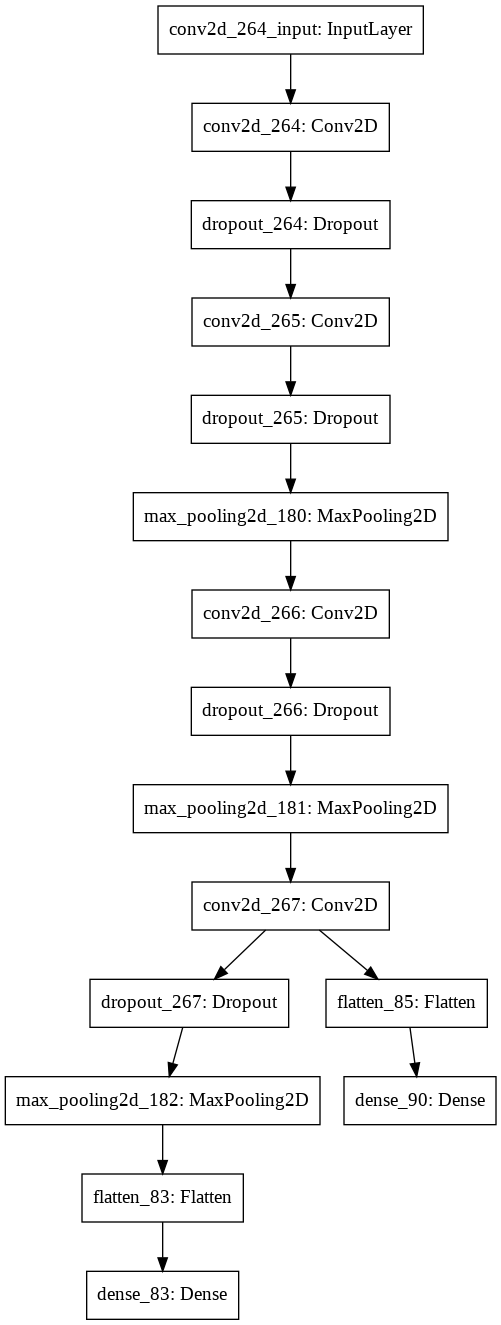

In [107]:
utils.plot_model(model3)

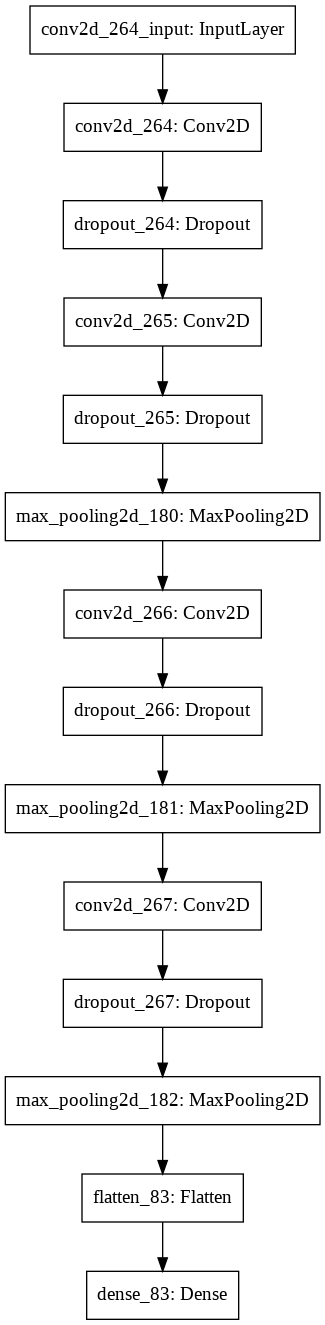

In [129]:
utils.plot_model(model)

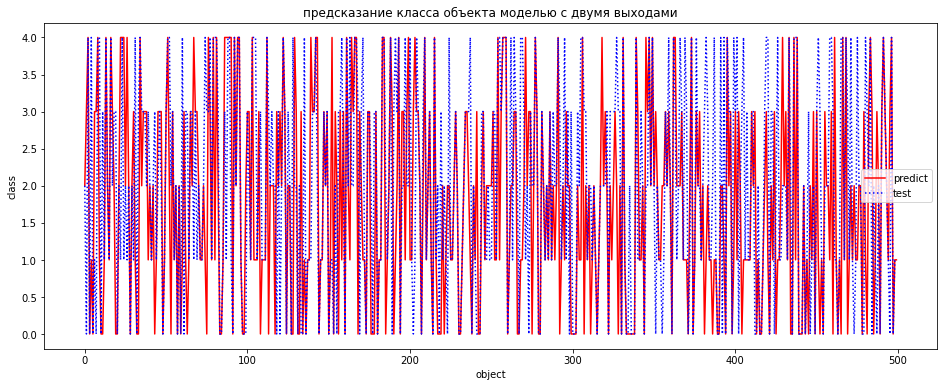

In [136]:
y_p=model3.predict(X_t)
R=np.argmax(y_p[1],axis=1)
Y_p=np.argmax(y_p[0],axis=1)
#Y_p=np.argmax(y_p,axis=1)
plt.figure(figsize=(16,6))
plt.plot(Y_p,'r',label='predict')
plt.plot(np.argmax(Y_t,axis=1),':b',label='test')

plt.legend()
plt.xlabel('object')
plt.ylabel('class')

plt.title('предсказание класса объекта моделью с двумя выходами')
plt.show()

In [150]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_t,axis=1),Y_p))



from sklearn.metrics import accuracy_score

for i in range(5):
  y=np.argmax(Y_t,axis=1)
  p=Y_p.copy()
  y[np.where(y!=i)]=i+1
  p[np.where(p!=i)]=i+1
  print(str(i)+': '+str(accuracy_score(y,p)))
             



              precision    recall  f1-score   support

           0       0.64      0.73      0.68       100
           1       0.62      0.75      0.68       100
           2       0.52      0.55      0.54       100
           3       0.43      0.39      0.41       100
           4       0.70      0.49      0.58       100

    accuracy                           0.58       500
   macro avg       0.58      0.58      0.58       500
weighted avg       0.58      0.58      0.58       500

0: 0.864
1: 0.858
2: 0.81
3: 0.776
4: 0.856


array([5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5])

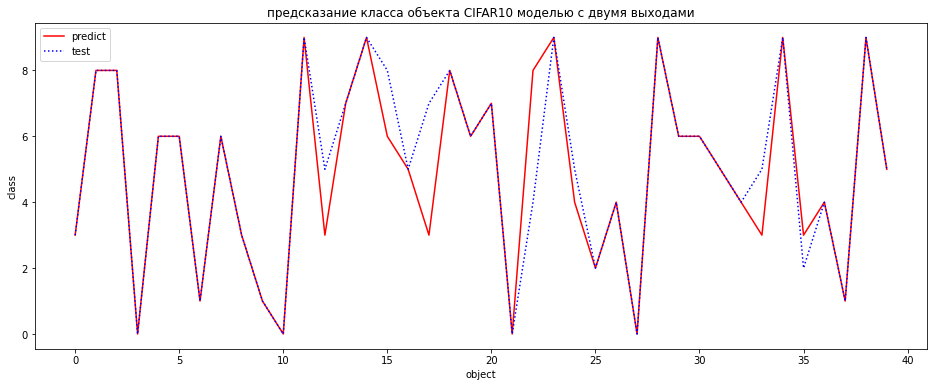

In [152]:
y_p=model3.predict(X_test)
R=np.argmax(y_p[1],axis=1)
Y_p=np.argmax(y_p[0],axis=1)
#Y_p=np.argmax(y_p,axis=1)
plt.figure(figsize=(16,6))
plt.plot(R[:40],'r',label='predict')
plt.plot(np.argmax(y_test[:40],axis=1),':b',label='test')

plt.legend()
plt.xlabel('object')
plt.ylabel('class')

plt.title('предсказание класса объекта CIFAR10 моделью с двумя выходами')
plt.show()

In [154]:
print(classification_report(np.argmax(y_test,axis=1),R))



for i in range(10):
  y=np.argmax(y_test,axis=1)
  p=R.copy()
  y[np.where(y!=i)]=i+1
  p[np.where(p!=i)]=i+1
  print(str(i)+': '+str(accuracy_score(y,p)))
             




              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1000
           1       0.91      0.82      0.87      1000
           2       0.62      0.62      0.62      1000
           3       0.51      0.67      0.58      1000
           4       0.66      0.76      0.70      1000
           5       0.72      0.59      0.65      1000
           6       0.72      0.86      0.79      1000
           7       0.88      0.67      0.76      1000
           8       0.81      0.86      0.84      1000
           9       0.89      0.79      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

0: 0.9563
1: 0.9744
2: 0.9239
3: 0.9029
4: 0.936
5: 0.9359
6: 0.9534
7: 0.9574
8: 0.9663
9: 0.9689
